In [ ]:
import pandas as pd
import sqlite3
from sqlite3 import Error
import matplotlib
import matplotlib.pyplot as plt
from crontab import CronTab
import email, smtplib, ssl

from email import encoders
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

In [6]:
conn = sqlite3.connect('cbs_db.sqlite')

In [7]:
DailyBookingdf = pd.read_sql_query("select date(created_at) as 'Date',count(*) as 'TotalBookings' from bookings where cancelled = 'no' group by date(created_at)", conn)

In [8]:
DailyBookingdf.head()

,Date,TotalBookings
0,2020-05-28,2


In [9]:
MonthlyBookingdf = pd.read_sql_query("select strftime('%m',date(created_at)) as 'Month',count(*) as 'TotalBookings' from bookings where cancelled = 'no' group by strftime('%m',date(created_at))", conn)

In [10]:
MonthlyBookingdf.head()

,Month,TotalBookings
0,05,2


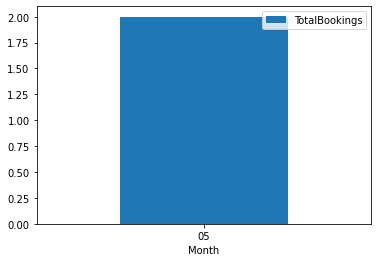

In [11]:
plot =  MonthlyBookingdf.plot.bar(x='Month',y='TotalBookings', rot=0)

In [12]:
fig = plot.get_figure()
fig.savefig("MonthlyBooking.pdf")

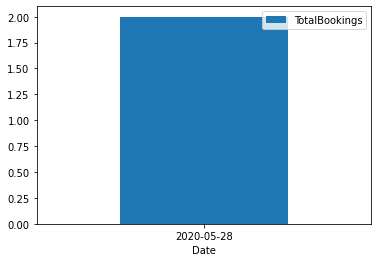

In [13]:
plot2 =  DailyBookingdf.plot.bar(x='Date',y='TotalBookings', rot=0)
fig = plot.get_figure()
fig.savefig("DailyBooking.png")

In [14]:
from crontab import CronTab

my_cron = CronTab(user='nineleaps')
job = my_cron.new(command='python /home/nineleaps/PythonAssignments/CBS/src/cronTask.py', comment='cabbookings')
job.minute.every(1)
my_cron.write()

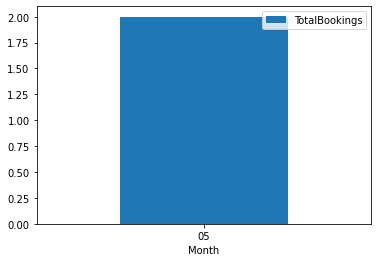

In [15]:
MonthlyBookingdf = pd.read_sql_query("select strftime('%m',date(created_at)) as 'Month',count(*) as 'TotalBookings' from bookings where cancelled = 'no' group by strftime('%m',date(created_at))", conn)
MonthlyBookingdf.head()
plot = MonthlyBookingdf.plot.bar(x='Month',y='TotalBookings', rot=0)
fig = plot.get_figure()
fig.savefig("MonthlyBooking.pdf")

In [ ]:
def send_email():
    subject = "Cab Booking Details"
    body = 'Please find the monthly booking details attached with this email'
    sender_email = "testcronjob268@gmail.com"
    receiver_email = "captaincold268@gmail.com"
    password = input("Type your password and press enter:")

    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject
    message["Bcc"] = receiver_email

    message.attach(MIMEText(body, "plain"))

    filename = "MonthlyBooking.pdf"  
    
    with open(filename, "rb") as attachment:
        part = MIMEBase("application", "octet-stream")
        part.set_payload(attachment.read())

    encoders.encode_base64(part)

    part.add_header(
        "Content-Disposition",
        f"attachment; filename= {filename}",
    )

    message.attach(part)
    text = message.as_string()

    context = ssl.create_default_context()
    with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, text)

send_email()